In [1]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input/ciciot2023'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/ciciot2023/part-00128-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
/kaggle/input/ciciot2023/part-00089-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
/kaggle/input/ciciot2023/part-00034-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
/kaggle/input/ciciot2023/part-00042-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
/kaggle/input/ciciot2023/part-00160-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
/kaggle/input/ciciot2023/part-00096-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
/kaggle/input/ciciot2023/part-00110-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
/kaggle/input/ciciot2023/part-00078-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
/kaggle/input/ciciot2023/part-00113-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
/kaggle/input/ciciot2023/part-00091-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
/kaggle/input/ciciot2023/part-00058-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
/kaggle/input/ciciot2023/part-00105-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
/kaggle/input/ci

In [2]:
import time
import pandas as pd
import multiprocessing

def read_csv(filename):
    return pd.read_csv(filename)

csvs = []
pool = multiprocessing.Pool()

start_time = time.time()

for i in range(10, 39):
    filename = "/kaggle/input/ciciot2023/part-000{}-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv".format(i)
    result = pool.apply_async(read_csv, (filename,))
    csvs.append(result)

# Wait for all processes to complete
pool.close()
pool.join()

end_time = time.time()
execution_time = end_time - start_time

# Retrieve the results
csvs = [result.get() for result in csvs]

print("Parallel execution time: {:.2f} seconds".format(execution_time))

Parallel execution time: 40.43 seconds


In [3]:
dataset = pd.concat(csvs).reset_index(drop = True) # Import
dataset.head()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,54.0,6.00,64.00,27.739647,27.739647,0.0,0.0,0.0,0.0,...,0.000000,54.0,8.333125e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-PSHACK_Flood
1,0.005011,6831.0,16.83,63.36,27292.469571,27292.469571,0.0,0.0,0.0,0.0,...,0.377989,50.1,8.301666e+07,9.5,10.011452,0.535314,1.045327,0.14,141.55,DoS-UDP_Flood
2,4.539816,108.0,6.00,64.00,0.440547,0.440547,0.0,0.0,0.0,0.0,...,0.000000,54.0,8.295607e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DoS-TCP_Flood
3,4.501544,108.0,6.00,64.00,0.444292,0.444292,0.0,0.0,0.0,0.0,...,0.000000,54.0,8.294753e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DoS-TCP_Flood
4,0.186995,268413.0,17.00,64.00,2597.167113,2597.167113,0.0,0.0,0.0,0.0,...,0.000000,554.0,8.378470e+07,9.5,33.286634,0.000000,0.000000,0.00,141.55,Mirai-udpplain


In [4]:
dataset.shape

(7483406, 47)

In [5]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7483406 entries, 0 to 7483405
Data columns (total 47 columns):
 #   Column           Dtype  
---  ------           -----  
 0   flow_duration    float64
 1   Header_Length    float64
 2   Protocol Type    float64
 3   Duration         float64
 4   Rate             float64
 5   Srate            float64
 6   Drate            float64
 7   fin_flag_number  float64
 8   syn_flag_number  float64
 9   rst_flag_number  float64
 10  psh_flag_number  float64
 11  ack_flag_number  float64
 12  ece_flag_number  float64
 13  cwr_flag_number  float64
 14  ack_count        float64
 15  syn_count        float64
 16  fin_count        float64
 17  urg_count        float64
 18  rst_count        float64
 19  HTTP             float64
 20  HTTPS            float64
 21  DNS              float64
 22  Telnet           float64
 23  SMTP             float64
 24  SSH              float64
 25  IRC              float64
 26  TCP              float64
 27  UDP         

In [6]:
dataset.describe()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight
count,7.483406e+06,7.483406e+06,7.483406e+06,7.483406e+06,7.483406e+06,7.483406e+06,7.483406e+06,7.483406e+06,7.483406e+06,7.483406e+06,...,7.483406e+06,7.483406e+06,7.483406e+06,7.483406e+06,7.483406e+06,7.483406e+06,7.483406e+06,7.483406e+06,7.483406e+06,7.483406e+06
mean,5.683018e+00,7.664121e+04,9.069830e+00,6.635824e+01,9.070311e+03,9.070311e+03,7.583956e-06,8.651301e-02,2.071527e-01,9.045600e-02,...,1.248331e+02,3.343603e+01,1.248265e+02,8.318493e+07,9.498598e+00,1.312794e+01,4.725216e+01,3.078110e+04,9.658547e-02,1.415155e+02
std,2.656252e+02,4.602743e+05,8.949797e+00,1.403601e+01,1.000139e+05,1.000139e+05,1.117252e-02,2.811201e-01,4.052660e-01,2.868340e-01,...,2.414237e+02,1.604726e+02,2.416523e+02,1.705570e+07,8.197269e-01,8.637729e+00,2.269612e+02,3.182201e+05,2.332408e-01,2.108030e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.200000e+01,0.000000e+00,4.200000e+01,0.000000e+00,1.000000e+00,9.165151e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,0.000000e+00,5.400000e+01,6.000000e+00,6.400000e+01,2.091844e+00,2.091844e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,5.000000e+01,0.000000e+00,5.000000e+01,8.307157e+07,9.500000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.415500e+02
50%,0.000000e+00,5.400000e+01,6.000000e+00,6.400000e+01,1.577386e+01,1.577386e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,5.400000e+01,0.000000e+00,5.400000e+01,8.312452e+07,9.500000e+00,1.039230e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.415500e+02
75%,1.052847e-01,2.929275e+02,1.444000e+01,6.400000e+01,1.177634e+02,1.177634e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,5.405011e+01,3.722288e-01,5.406000e+01,8.334391e+07,9.500000e+00,1.039671e+01,5.059213e-01,1.345884e+00,8.000000e-02,1.415500e+02
max,7.487996e+04,9.905359e+06,4.700000e+01,2.550000e+02,8.388608e+06,8.388608e+06,2.805555e+01,1.000000e+00,1.000000e+00,1.000000e+00,...,1.160047e+04,9.302373e+03,7.885200e+03,1.676394e+08,1.500000e+01,1.453904e+02,1.315554e+04,9.670837e+07,1.000000e+00,2.446000e+02


In [7]:
#Menghitung persentase null dalam kolom
dataset_null = round(100*(dataset.isnull().sum())/len(dataset), 2)
dataset_null

flow_duration      0.0
Header_Length      0.0
Protocol Type      0.0
Duration           0.0
Rate               0.0
Srate              0.0
Drate              0.0
fin_flag_number    0.0
syn_flag_number    0.0
rst_flag_number    0.0
psh_flag_number    0.0
ack_flag_number    0.0
ece_flag_number    0.0
cwr_flag_number    0.0
ack_count          0.0
syn_count          0.0
fin_count          0.0
urg_count          0.0
rst_count          0.0
HTTP               0.0
HTTPS              0.0
DNS                0.0
Telnet             0.0
SMTP               0.0
SSH                0.0
IRC                0.0
TCP                0.0
UDP                0.0
DHCP               0.0
ARP                0.0
ICMP               0.0
IPv                0.0
LLC                0.0
Tot sum            0.0
Min                0.0
Max                0.0
AVG                0.0
Std                0.0
Tot size           0.0
IAT                0.0
Number             0.0
Magnitue           0.0
Radius             0.0
Covariance 

In [8]:
print(dataset['label'].unique())

['DDoS-PSHACK_Flood' 'DoS-UDP_Flood' 'DoS-TCP_Flood' 'Mirai-udpplain'
 'DDoS-UDP_Flood' 'DDoS-ICMP_Flood' 'DDoS-RSTFINFlood' 'DDoS-TCP_Flood'
 'DDoS-SynonymousIP_Flood' 'Mirai-greip_flood' 'DoS-SYN_Flood'
 'DDoS-SYN_Flood' 'Mirai-greeth_flood' 'BenignTraffic' 'MITM-ArpSpoofing'
 'DDoS-UDP_Fragmentation' 'DDoS-ACK_Fragmentation' 'DNS_Spoofing'
 'DDoS-SlowLoris' 'DDoS-ICMP_Fragmentation' 'Recon-PingSweep'
 'Recon-OSScan' 'Recon-HostDiscovery' 'DictionaryBruteForce'
 'DoS-HTTP_Flood' 'Uploading_Attack' 'Recon-PortScan' 'VulnerabilityScan'
 'SqlInjection' 'XSS' 'DDoS-HTTP_Flood' 'BrowserHijacking'
 'CommandInjection' 'Backdoor_Malware']


In [9]:
dataset['label'].astype(str)

0          DDoS-PSHACK_Flood
1              DoS-UDP_Flood
2              DoS-TCP_Flood
3              DoS-TCP_Flood
4             Mirai-udpplain
                 ...        
7483401        DoS-UDP_Flood
7483402      DDoS-ICMP_Flood
7483403       DDoS-SYN_Flood
7483404     DDoS-RSTFINFlood
7483405       DDoS-SYN_Flood
Name: label, Length: 7483406, dtype: object

In [10]:
def create_label_map(dataset):
    unique_labels = dataset['label'].unique()
    label_map = {label: idx+1 for idx, label in enumerate(unique_labels)}
    return label_map

# Example usage:
label_map = create_label_map(dataset)
print(label_map)

{'DDoS-PSHACK_Flood': 1, 'DoS-UDP_Flood': 2, 'DoS-TCP_Flood': 3, 'Mirai-udpplain': 4, 'DDoS-UDP_Flood': 5, 'DDoS-ICMP_Flood': 6, 'DDoS-RSTFINFlood': 7, 'DDoS-TCP_Flood': 8, 'DDoS-SynonymousIP_Flood': 9, 'Mirai-greip_flood': 10, 'DoS-SYN_Flood': 11, 'DDoS-SYN_Flood': 12, 'Mirai-greeth_flood': 13, 'BenignTraffic': 14, 'MITM-ArpSpoofing': 15, 'DDoS-UDP_Fragmentation': 16, 'DDoS-ACK_Fragmentation': 17, 'DNS_Spoofing': 18, 'DDoS-SlowLoris': 19, 'DDoS-ICMP_Fragmentation': 20, 'Recon-PingSweep': 21, 'Recon-OSScan': 22, 'Recon-HostDiscovery': 23, 'DictionaryBruteForce': 24, 'DoS-HTTP_Flood': 25, 'Uploading_Attack': 26, 'Recon-PortScan': 27, 'VulnerabilityScan': 28, 'SqlInjection': 29, 'XSS': 30, 'DDoS-HTTP_Flood': 31, 'BrowserHijacking': 32, 'CommandInjection': 33, 'Backdoor_Malware': 34}


In [11]:
dataset['label'] = dataset['label'].map(label_map)

In [12]:
correlation_matrix = dataset.corr()

In [13]:
# Exclude autocorrelation and get the top n highest correlated attributes
n = 15  # Set the number of attributes you want to display
top_corr = correlation_matrix['label'].drop('label').nlargest(n)

# Add the 'label' attribute as the center of the correlation
top_corr = pd.concat([top_corr, correlation_matrix['label'].drop('label')])

In [14]:
top_corr = pd.DataFrame(top_corr)

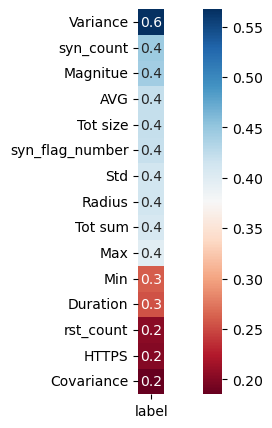

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# Create the heatmap
sns.heatmap(top_corr.head(15), annot=True, cmap="RdBu", fmt=".1f", square=True)

# Display the heatmap
plt.show()

In [16]:
# Split data into x(input) and y(output)
top_15_attributes = list(top_corr.index)[:n]
x = dataset[top_15_attributes]
y = dataset['label']

In [17]:
x.head()

,Variance,syn_count,Magnitue,AVG,Tot size,syn_flag_number,Std,Radius,Tot sum,Max,Min,Duration,rst_count,HTTPS,Covariance
0,0.00,0.0,10.392305,54.000000,54.0,0.0,0.000000,0.000000,567.0,54.0,54.0,64.00,1.0,0.0,0.000000
1,0.14,0.0,10.011452,50.114774,50.1,0.0,0.377989,0.535314,526.4,51.4,50.0,63.36,0.0,0.0,1.045327
2,0.00,0.0,10.392305,54.000000,54.0,0.0,0.000000,0.000000,567.0,54.0,54.0,64.00,0.0,1.0,0.000000
3,0.00,0.0,10.392305,54.000000,54.0,0.0,0.000000,0.000000,567.0,54.0,54.0,64.00,0.0,0.0,0.000000
4,0.00,0.0,33.286634,554.000000,554.0,0.0,0.000000,0.000000,5817.0,554.0,554.0,64.00,0.0,0.0,0.000000


In [18]:
y.head()

0    1
1    2
2    3
3    3
4    4
Name: label, dtype: int64

In [19]:
x.shape

(7483406, 15)

In [20]:
y.shape

(7483406,)

In [21]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.002, random_state=42)

DECISION TREE

In [22]:
import time
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_split=20)
clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_split=20)

In [23]:
pred = clf.predict(x_test)

In [24]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,pred)
print(acc)

0.7368878198703815
